### Step 1: Import necessary package and set up environment

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, anderson, shapiro, skew, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd


In [2]:
# Loading dataset to Pandas DataFrame
data = pd.read_csv('creditcard_2023.csv')

### Step 2: Data importation and preliminary inspection


In [3]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
# Dateset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


### Step 3: Clean the data

In [6]:
#Drop unnecessary, row-specific columns ('id') from the DataFrame
data.drop(columns=['id'],inplace=True)


#### Missing data check

In [7]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Duplicate entries check


In [8]:

with pd.option_context('display.max_columns', 40):
    display(data[data.duplicated(subset=data.columns, keep=False)])
    
# drop the duplicate
data.drop_duplicates(subset= data.columns,inplace= True )

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
323127,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,0.990274,-0.70778,-1.891977,-1.183117,-0.287687,-1.230971,-0.722383,-0.99063,-0.169996,-4.118596,8.08708,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,22549.29,1
510531,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,0.990274,-0.70778,-1.891977,-1.183117,-0.287687,-1.230971,-0.722383,-0.99063,-0.169996,-4.118596,8.08708,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,22549.29,1


#### Finding outliers
Finding the data does not lines in the lowerbound and upperbown of the IQR

In [9]:
def find_outlier_indices(data_series, method='z-score', z_score_threshold=3, outlier_multiplier=1.5):
    #using z_score
    if method == 'z-score':
        # calculate the z-score:
        z_score = (data_series - data_series.mean()) // data_series.std()
        
        #find the outlier indices
        outlier_indices = z_score[abs(z_score) > z_score_threshold].index.tolist()
        if len(outlier_indices) > 0:
            return {
                'index': outlier_indices,
                'z-score': z_score[outlier_indices].round(2).tolist()
            }
        else:
            return None
    if method == 'IQR':
        # Calculate the quantiles
        q1 = data_series.quantile(0.25)
        q3 = data_series.quantile(0.75)
        IQR = q3-q1
        
        # Calculate the lower bound and the upper bound
        lower_b = q1 - outlier_multiplier * IQR
        upper_b = q3 + outlier_multiplier * IQR
        outlier_indices = data_series[(data_series < lower_b) | 
                                      (data_series > upper_b)].index.tolist()
        
        if len(outlier_indices) > 0:
            return {
                'index': outlier_indices,
                'IQR_diff': data_series[outlier_indices].apply(
                    lambda x: x - lower_b if x < lower_b else x - upper_b
                ).tolist()
            }
        else: return None


In [10]:
column = data.columns.values
column

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'], dtype=object)

In [11]:
# Create a dictionary to store oulier indices
outlier_mapping = {
    col: find_outlier_indices(data[col], method='IQR')
    for col in data
}

# Extract outlier indices from the dictionary and flatten the list
outlier_indices = sum(
    [item['index'] for _, item in outlier_mapping.items() if item is not None],
    []
)

# Print the number of outliers detected for each feature
print(f'Number of outliers per factor:')
pd.DataFrame(
    {
        col: [len(item['index'])] if item is not None else 0
        for col, item in outlier_mapping.items()
    }
 ).transpose() \
    .reset_index() \
    .rename(columns={'index': 'Feature', 0: 'Number of outlier detected'}) \
     .sort_values(['Number of outlier detected'], ascending=False)

Number of outliers per factor:


,Feature,Number of outlier detected
7,V8,93855
26,V27,82235
22,V23,72055
4,V5,71015
27,V28,70242
19,V20,65707
20,V21,57137
6,V7,55996
5,V6,48853
1,V2,43619


#### Heatmap of all feature columns


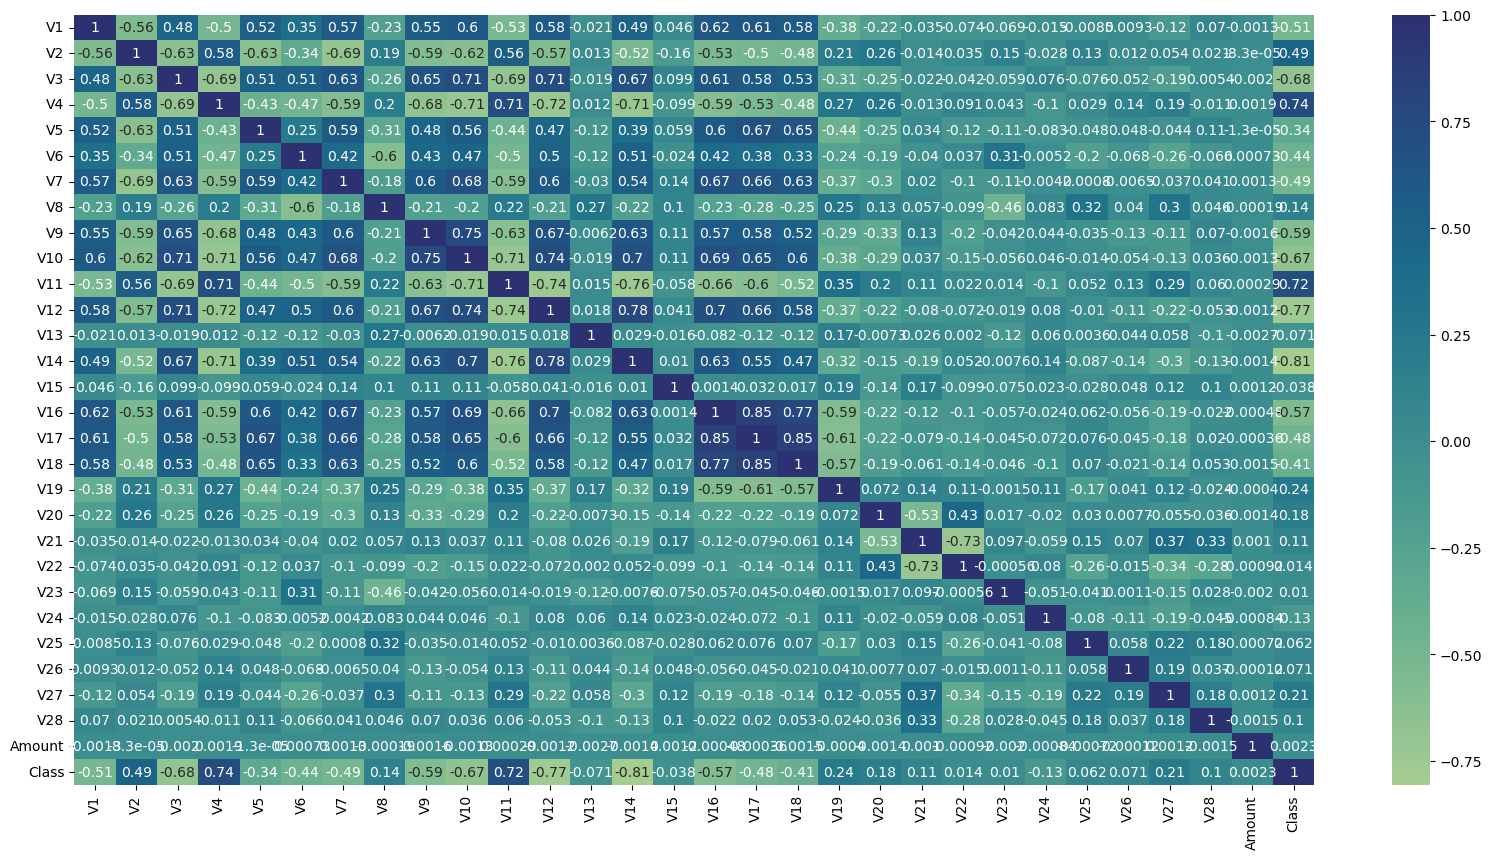

In [12]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(data.corr(), cmap='crest', annot=True)
plt.show()

#### Step 3: Preprocessing data to modelling

In [13]:
#Compare the values for both transactions
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,0.673665,...,-0.179851,-0.109640,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,-0.505757,0.491871,-0.682094,0.735982,-0.338637,-0.435101,-0.491228,0.144316,-0.585525,-0.673665,...,0.179866,0.109612,0.014121,0.010232,-0.130103,0.061846,0.071053,0.213997,0.102017,12057.564862


In [14]:
data['Class'].value_counts()

0    284315
1    284314
Name: Class, dtype: int64

Concatenating two DataFrame

In [15]:
#s split the data
legit = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [16]:
fraud.Amount.describe()

count    284314.000000
mean      12057.564862
std        6909.735027
min          50.010000
25%        6074.615000
50%       12062.410000
75%       18033.760000
max       24039.930000
Name: Amount, dtype: float64

In [17]:
legit.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [19]:
# Define Feature and Target
X = data.drop(axis = 1, columns=['Class'])
Y = data['Class']

In [20]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [21]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568629, dtype: int64

In [22]:
# split the data into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

print(X_train.shape, X_test.shape)

(398040, 29) (170589, 29)


#### Step 4: Training model using Logistic Regression 

In [23]:
	
#scale the data to standardize the features, mean = 0 and var = 1, help the function converge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:

train_model = LogisticRegression(max_iter = 1000)
train_model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

#### Step 5: Model evaluation using test set

In [29]:
#score accuracy on training data

X_train_predict = train_model.predict(X_train_scaled)
training_accuracy = accuracy_score(X_train_predict, Y_train)

print(X_train_predict)
print(Y_train.values)

print('Training set accuracy: ', training_accuracy)

report_training = classification_report(Y_train, X_train_predict)
print('Detailed performance: \n', report_training)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
Training set accuracy:  0.9650638126821425
Detailed performance: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97    199020
           1       0.98      0.95      0.96    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040



In [30]:
#score accuracy on test data

X_test_predict = train_model.predict(X_test_scaled)
test_accuracy = accuracy_score(X_test_predict, Y_test)

print(X_test_predict)
print(Y_test.values)

print('Test set accuracy: ', test_accuracy)

report_test = classification_report(Y_test, X_test_predict)
print('Detailed performance: \n',report_test)

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
Test set accuracy:  0.9646577446376965
Detailed performance: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     85295
           1       0.98      0.95      0.96     85294

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



#### Step 6: Analyze the impact of each feature on the probability of fraud and the coefficients corresponding to each feature

In [31]:
coefficients = train_model.coef_[0]
feature_names = X.columns

#store feature names and coefficient in dataframe

coef_df = pd.DataFrame({'Features': feature_names, 'Coefficients': coefficients})

#absolute value of the coefficients to see impact

coef_df['Abs Coefficient'] = abs(coef_df['Coefficients'])
coef_df = coef_df.sort_values(by = 'Abs Coefficient', ascending=False)

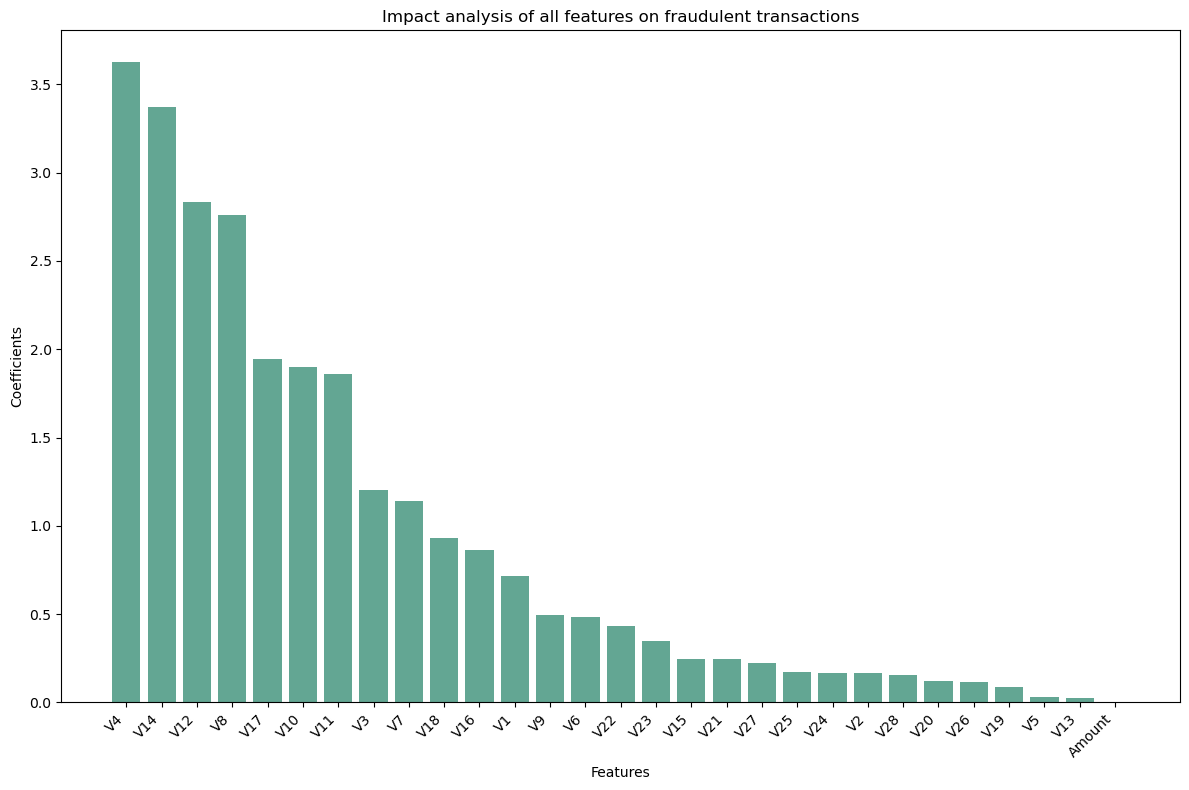

In [32]:
#Visual the impact of each feature

all_features  = coef_df['Features']
feature_coef = coef_df['Abs Coefficient']

plt.figure(figsize=(12,8))
plt.bar(all_features, feature_coef, color = '#63A693', width = 0.8)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Impact analysis of all features on fraudulent transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
#Print top 10 most impactful features

print('Top 10 most impactful features and their coefficients: ')
print(coef_df.head(10))

Top 10 most impactful features and their coefficients: 
   Features  Coefficients  Abs Coefficient
3        V4      3.625329         3.625329
13      V14     -3.370142         3.370142
11      V12     -2.833096         2.833096
7        V8     -2.759289         2.759289
16      V17     -1.943449         1.943449
9       V10     -1.896928         1.896928
10      V11      1.861864         1.861864
2        V3     -1.201616         1.201616
6        V7     -1.139688         1.139688
17      V18     -0.929742         0.929742
